In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [19]:
temp = pd.read_pickle('df_of_imdb_data.pkl')

In [20]:
temp['rating'] = temp['rating'].apply(lambda x: x if type(x) == float else np.nan)
temp['runtimes'] = temp['runtimes'].apply(lambda x: int(x[0]) if type(x[0]) == str else np.nan)
temp['metascore'] = temp['metascore'].apply(lambda x: int(x['data']['metascore']) if 'metascore' in x['data'].keys() else np.nan)
temp['year'] = temp['year'].apply(lambda x: x if type(x) == int else 2019) #movie 'outlander' imdb_id 10172802 did not have a year but it is 2019

In [21]:
temp.head()

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
0,0388130,Initial D: Third Stage,2001,13 Jan 2001 (Japan),[Japan],"[en, ja, cmn]","[Animation, Action, Romance, Sport]","[Australia:PG, Japan:G, United States:TV-PG]",7.6,1390,[Color],100,[],[2246748],"[1245306, 1564830]","[0179653, 0021660, 0099762, 0113955, 0036168]","[0179653, 0053157, 0039940, 0921883]",NaN,0
1,0273772,Don't Make Trouble!,2001,17 Jan 2001 (France),[France],"[fr, ar]","[Animation, Drama, Comedy]",[France:Tous publics],6.6,49,[Color],70,[],"[1007620, 0099748, 0501590, 0851724]","[0002174, 0071117, 0099379, 0181117, 0216816, ...","[0072738, 0069857]",[0038517],NaN,0
2,0243017,Waking Life,2001,07 Mar 2002 (Australia),[United States],[en],"[Animation, Drama, Fantasy]","[Argentina:13, Australia:M, Brazil:Livre, Cana...",7.7,63692,[Color],99,"{'Opening Weekend United States': '$88,977, 21...","[0438210, 0657921, 0782270, 0806189, 0808819, ...",[0000500],"[0028932, 0046530, 0042682, 0054189, 0123642, ...","[0000756, 0028932, 0007180, 0125154, 0067533, ...",83.0,0
3,0291559,Wave Twisters,2001,[],[United States],[en],"[Animation, Adventure, Musical, Sci-Fi]",[United States:Unrated],7.4,551,[Color],46,[],[1029039],"[1000898, 1037263]",[0060259],[],NaN,0
4,0277909,Mutant Aliens,2001,09 Jan 2002 (France),[United States],[en],"[Animation, Comedy, Sci-Fi]","[France:Tous publics, Germany:16, South Korea:...",6.6,1204,[Color],81,"{'Budget': '$200,000 (estimated)'}","[0390350, 0687739]",[0687739],[0077590],"[0068070, 0112126, 0084806]",39.0,0


In [22]:
# finds films where production companies were previously nominated for the best animated film.
# takes a dataframe and category returns a list of 1s and 0s.

def find_prev_nom(df, cat):
    prev_nom = []
    for year in range(2021, 2000, -1):
        #films_by_year is a df of all movies in year=year
        films_by_year = df.loc[df['year']==year][::-1]
        #makes a list of previous nominees in that cat
        previous_nom = df.loc[(df['year'] < year) & (df['is_nominee']==1)][cat].explode()
        set_previous_nom = set(previous_nom)
        for names in films_by_year[cat]:
            
            if set(names).intersection(previous_nom) == set():
                prev_nom.append(0)
            else:
                prev_nom.append(1)
    prev_nom.reverse()
    return prev_nom

In [23]:
prev_nom_pcomp_encoded = find_prev_nom(temp, 'production_company')

In [24]:
def ones_to_text(list_of_prev_nom):
    return ['Previously Nominated' if x ==1 else 'Not Previously Nominated' for x in list_of_prev_nom]

In [25]:
prev_nom_pcomp = ones_to_text(prev_nom_pcomp_encoded)

In [28]:
data = {'imdb_id':temp['imdb_id'], 'prev nom pcomp': prev_nom_pcomp, 
        'prev nom pcomp encoded':prev_nom_pcomp_encoded}

In [29]:
Data = pd.DataFrame(data)

In [30]:
Data.tail(50)

,imdb_id,prev nom pcomp,prev nom pcomp encoded
3851,18351574,Not Previously Nominated,0
3852,11951334,Not Previously Nominated,0
3853,16000358,Not Previously Nominated,0
3854,16259608,Not Previously Nominated,0
3855,13904188,Not Previously Nominated,0
3856,16421310,Not Previously Nominated,0
3857,16159984,Not Previously Nominated,0
3858,13575806,Previously Nominated,1
3859,13834480,Previously Nominated,1
3860,16345484,Not Previously Nominated,0


In [13]:
Data.loc[Data['imdb_id']=='0432283']

,imdb_id,prev nom prod comp,prev nom pcomp encoded
835,0432283,Not Previously Nominated,0


In [14]:
temp.loc[temp['imdb_id']=='13575806']

,imdb_id,titles,year,original_air_date,countries,language,genres,certificates,rating,votes,color_info,runtimes,box_office,producers,directors,production_company,distributors,metascore,is_nominee
3858,13575806,Back to the Outback,2021,10 Dec 2021 (USA),"[Australia, United States]",[en],"[Animation, Adventure, Comedy, Family]","[Argentina:7, Australia:G, Brazil:10::(self-ap...",6.5,7443,[Color],95,[],"[0167795, 0326040, 0504298, 2499267, 3538934]","[0187912, 0208005]","[0743375, 0051162, 0093488]",[0144901],58.0,0


In [31]:
temp = temp.join(Data.set_index('imdb_id'), on='imdb_id')

In [32]:
imdb_train = temp.loc[temp['year']<2018]

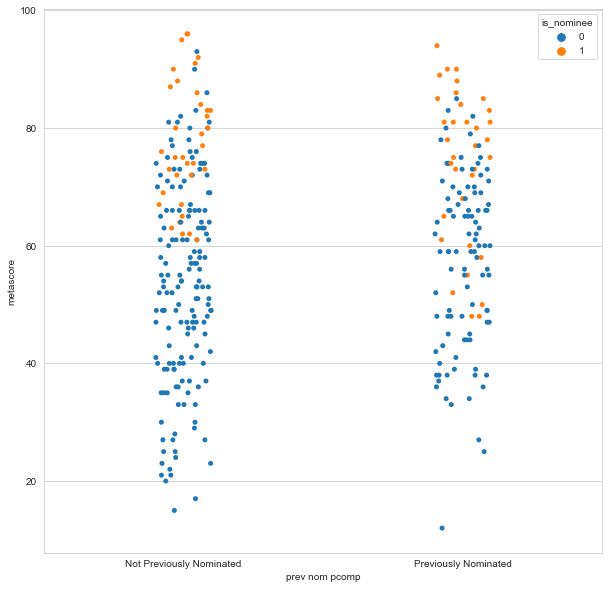

In [33]:
plt.figure(figsize=(10,10))
sns.stripplot(x='prev nom pcomp', y='metascore', data=imdb_train, hue='is_nominee')
plt.show()

In [ ]:
imdb_train['metascore'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom dir encoded']==1]['metascore'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom dir encoded']==0]['metascore'].mean()

In [ ]:
imdb_train['rating'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom dir encoded']==1]['rating'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom dir encoded']==0]['rating'].mean()

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(x='prev nom prod', y='metascore', data=imdb_train, hue='is_nominee')
plt.show()

In [ ]:
imdb_train.loc[imdb_train['prev nom prod encoded']==1]['metascore'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom prod encoded']==0]['metascore'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom prod encoded']==1]['rating'].mean()

In [ ]:
imdb_train.loc[imdb_train['prev nom prod encoded']==0]['rating'].mean()

In [ ]:
plt.figure(figsize=(10,10))
sns.stripplot(x='year', y='metascore', data=imdb_train, hue='is_nominee')
plt.show()

In [34]:
Data.to_pickle('df_previous_nom_production_comp.pkl')

In [35]:
Data.head()

,imdb_id,prev nom pcomp,prev nom pcomp encoded
0,0388130,Not Previously Nominated,0
1,0273772,Not Previously Nominated,0
2,0243017,Not Previously Nominated,0
3,0291559,Not Previously Nominated,0
4,0277909,Not Previously Nominated,0
